In [119]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import tqdm as tqdm

#Scaling
from sklearn.preprocessing import StandardScaler
#For sampling
from imblearn.over_sampling import ADASYN 
#Spliting the dataset
from sklearn.model_selection import train_test_split
#Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
#For KFold
from sklearn.model_selection import RepeatedStratifiedKFold
#metrics
from sklearn.metrics import confusion_matrix,recall_score, f1_score, accuracy_score, precision_score,roc_auc_score
#GridSearch
from sklearn.model_selection import GridSearchCV

In [120]:
df = pd.read_csv('Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [121]:
df_1 = df.copy()

In [122]:
df_1.isnull().sum()
#No null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [123]:
for i in df_1.columns:
    if df_1[i].nunique()==1:
        print(i)

EmployeeCount
Over18
StandardHours


In [124]:
df_1 = df_1.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'] , axis=1)
df_1.shape

(1470, 31)

In [125]:
df_1['Education'].replace({ 1 : 'Below_College', 2 : 'College', 3 : 'Bachelor', 4 : 'Master', 5 : 'Doctor'}, inplace =True)
df_1['EnvironmentSatisfaction'].replace({ 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'}, inplace =True)
df_1['JobInvolvement'].replace({ 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'}, inplace =True)
df_1['JobSatisfaction'].replace({ 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'}, inplace =True)
df_1['PerformanceRating'].replace({ 1 : 'Low', 2 : 'Good', 3 : 'Excellen', 4 : 'Outstanding'}, inplace =True)
df_1['RelationshipSatisfaction'].replace({ 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'}, inplace =True)
df_1['WorkLifeBalance'].replace({ 1 : 'Bad', 2 : 'Good', 3 : 'Better', 4 : 'Best'}, inplace =True)


In [126]:
df_1['Attrition'].replace({ 'No' : 0, 'Yes' : 1  }, inplace= True)

In [127]:
df_1['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

### Correlation check

In [149]:
#cor_matrix = df_1.corr().abs()
cor_matrix = df_1.corr().abs()

cor_matrix.style.background_gradient(sns.light_palette('#79C', as_cmap=True))

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.159205,0.010661,0.001686,0.024287,0.509604,0.497855,0.028051,0.299635,0.003634,0.037510,0.680381,0.019621,0.311309,0.212901,0.216513,0.202089
Attrition,0.159205,1.000000,0.056652,0.077924,0.006846,0.169105,0.159840,0.015170,0.043494,0.013478,0.137145,0.171063,0.059478,0.134392,0.160545,0.033019,0.156199
DailyRate,0.010661,0.056652,1.000000,0.004985,0.023381,0.002966,0.007707,0.032182,0.038153,0.022704,0.042143,0.014515,0.002453,0.034055,0.009932,0.033229,0.026363
DistanceFromHome,0.001686,0.077924,0.004985,1.000000,0.031131,0.005303,0.017014,0.027473,0.029251,0.040235,0.044872,0.004628,0.036942,0.009508,0.018845,0.010029,0.014406
HourlyRate,0.024287,0.006846,0.023381,0.031131,1.000000,0.027853,0.015794,0.015297,0.022157,0.009062,0.050263,0.002334,0.008548,0.019582,0.024106,0.026716,0.020123
JobLevel,0.509604,0.169105,0.002966,0.005303,0.027853,1.000000,0.950300,0.039563,0.142501,0.034730,0.013984,0.782208,0.018191,0.534739,0.389447,0.353885,0.375281
MonthlyIncome,0.497855,0.159840,0.007707,0.017014,0.015794,0.950300,1.000000,0.034814,0.149515,0.027269,0.005408,0.772893,0.021736,0.514285,0.363818,0.344978,0.344079
MonthlyRate,0.028051,0.015170,0.032182,0.027473,0.015297,0.039563,0.034814,1.000000,0.017521,0.006429,0.034323,0.026442,0.001467,0.023655,0.012815,0.001567,0.036746
NumCompaniesWorked,0.299635,0.043494,0.038153,0.029251,0.022157,0.142501,0.149515,0.017521,1.000000,0.010238,0.030075,0.237639,0.066054,0.118421,0.090754,0.036814,0.110319
PercentSalaryHike,0.003634,0.013478,0.022704,0.040235,0.009062,0.034730,0.027269,0.006429,0.010238,1.000000,0.007528,0.020608,0.005221,0.035991,0.001520,0.022154,0.011985


In [134]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)) #upper triangle of the correlation matrix


In [135]:
Higly_correlated_columns = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.80)]
Higly_correlated_columns

['MonthlyIncome']

In [153]:
df_1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# EDA

In [106]:
features = df_1.drop(['Attrition'], axis=1)

In [107]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   object
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   object
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   object
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   object
 14  MaritalStatus           

In [108]:
obj_cols = list(features.select_dtypes(include='object'))
int_cols = list(features.select_dtypes(include='int64'))

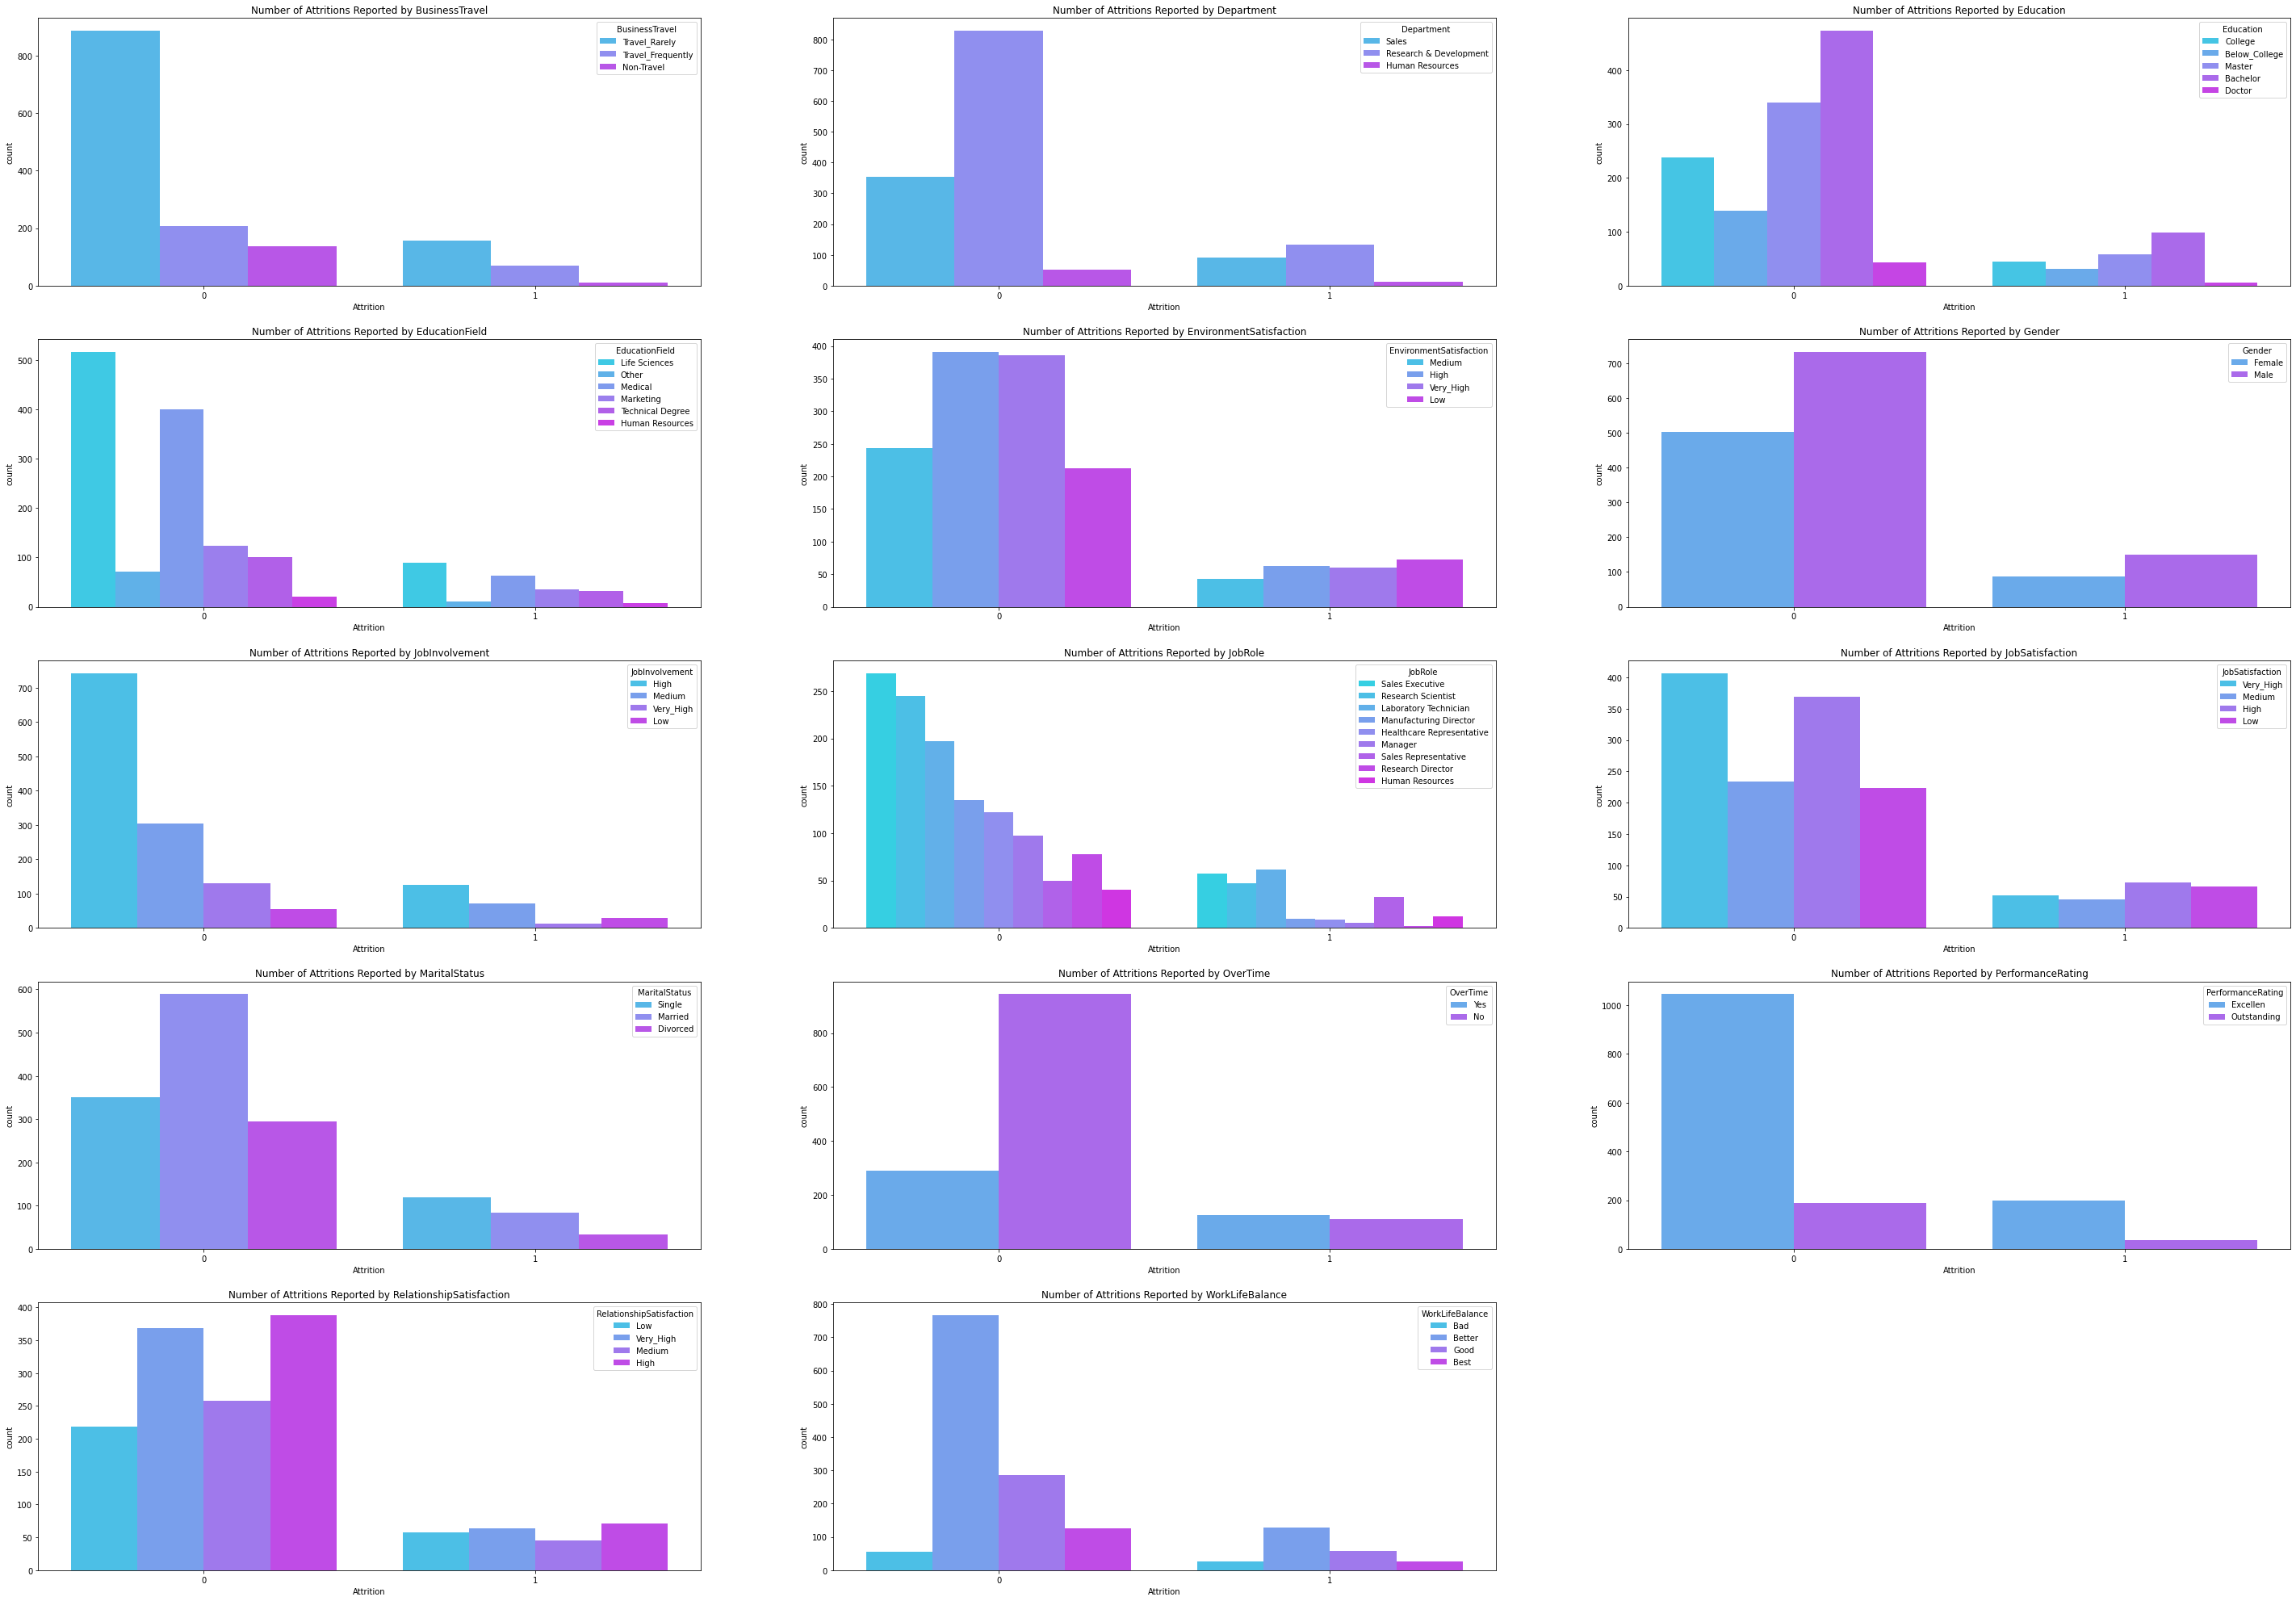

In [173]:
import matplotlib.gridspec as gridspec

plt.rcParams['figure.figsize'] = (50,50)
grid = gridspec.GridSpec(7, 3)

for n, i in enumerate(df_1[obj_cols]):
    ax = plt.subplot(grid[n])
    sns.countplot( x = df_1['Attrition'], hue = i , data = df_1,palette = 'cool').set_title(f'Number of Attritions Reported by {i}')
    
plt.show()

In [187]:
for i in obj_cols:
    print(df_1[(df_1["Attrition"] == 1)].groupby([i]).size() / df_1.groupby([i]).size())
    print('-----------'*5)


BusinessTravel
Non-Travel           0.080000
Travel_Frequently    0.249097
Travel_Rarely        0.149569
dtype: float64
-------------------------------------------------------
Department
Human Resources           0.190476
Research & Development    0.138398
Sales                     0.206278
dtype: float64
-------------------------------------------------------
Education
Bachelor         0.173077
Below_College    0.182353
College          0.156028
Doctor           0.104167
Master           0.145729
dtype: float64
-------------------------------------------------------
EducationField
Human Resources     0.259259
Life Sciences       0.146865
Marketing           0.220126
Medical             0.135776
Other               0.134146
Technical Degree    0.242424
dtype: float64
-------------------------------------------------------
EnvironmentSatisfaction
High         0.136865
Low          0.253521
Medium       0.149826
Very_High    0.134529
dtype: float64
---------------------------------------

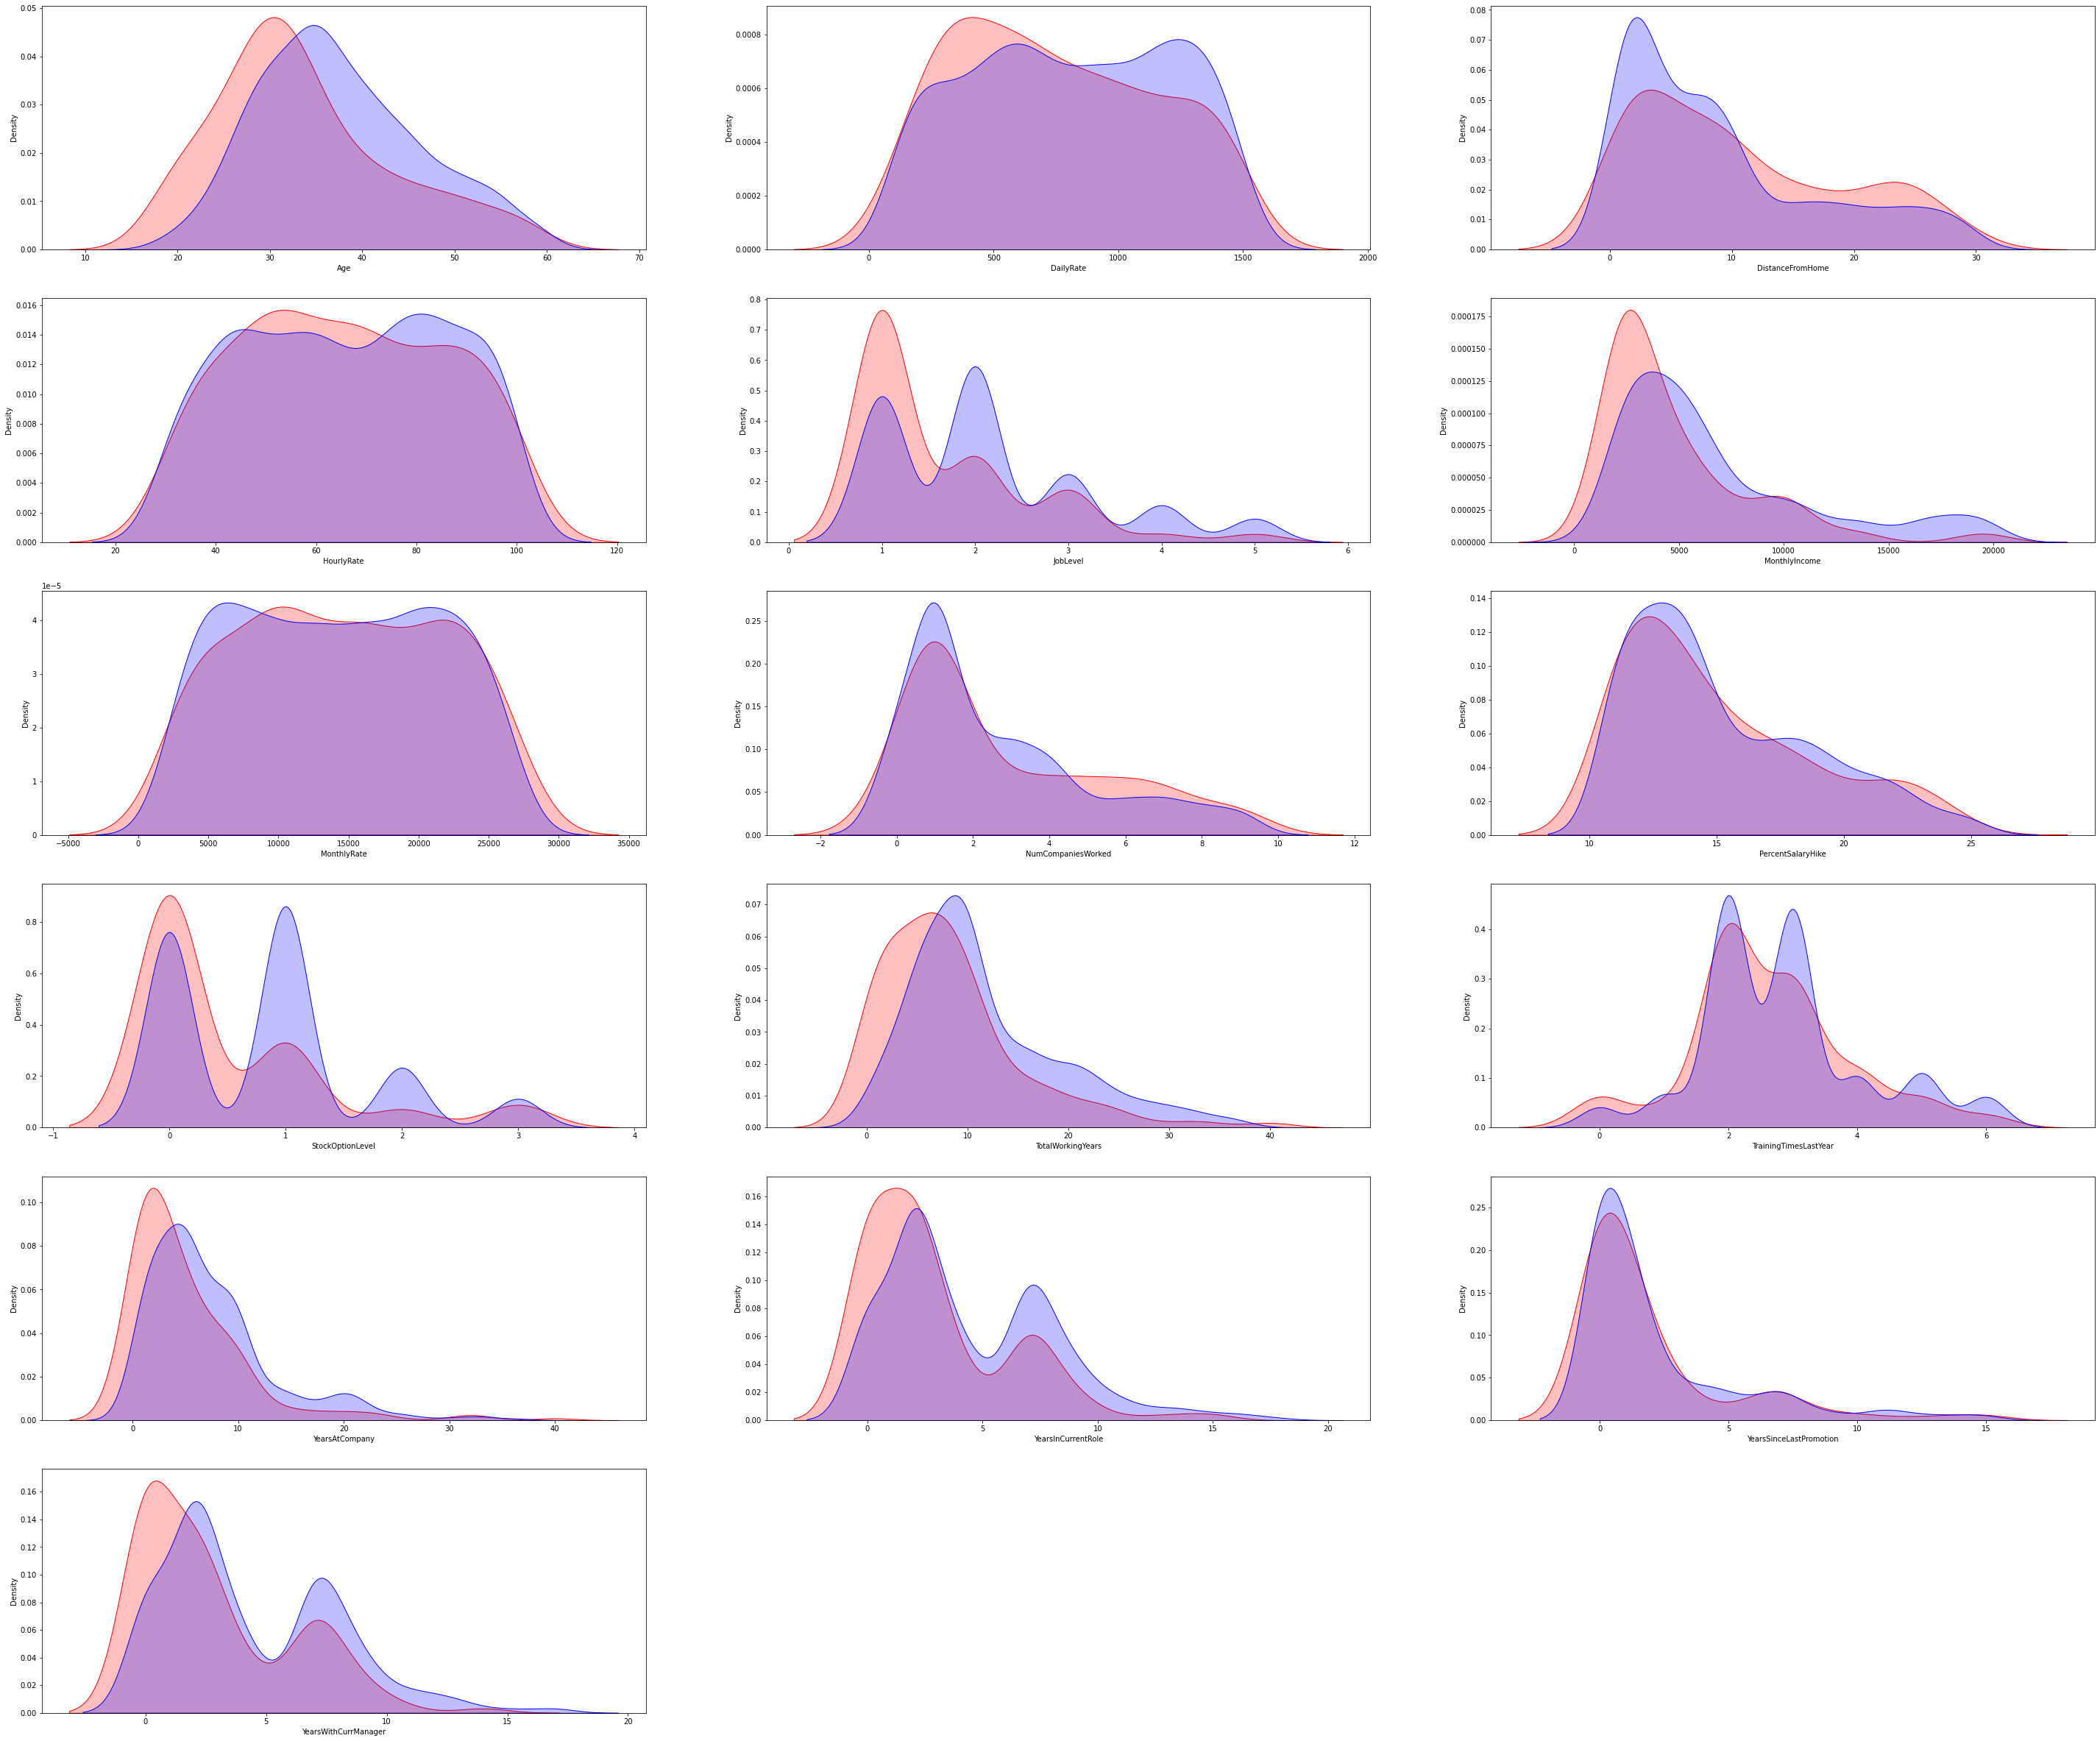

In [196]:
import matplotlib.gridspec as gridspec

plt.rcParams['figure.figsize'] = (50,50)
grid = gridspec.GridSpec(7, 3)

for n, i in enumerate(df_1[int_cols]):
    ax = plt.subplot(grid[n])
    sns.kdeplot( df_1.loc[(df_1['Attrition']==1), i], color ='r', shade=True, Label='Yes')
    sns.kdeplot( df_1.loc[(df_1['Attrition']==0), i], color ='b', shade=True, Label='No')



### Encoding categorical variable

In [109]:
obj_cols

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

In [110]:
data_cat = pd.get_dummies(df_1[obj_cols], drop_first=True)
data_cat.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_Below_College,Education_College,Education_Doctor,Education_Master,EducationField_Life Sciences,EducationField_Marketing,...,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very_High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,0,1,0,1,0,1,0,0,1,0,...,0,1,1,0,1,0,0,0,0,0
1,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
2,0,1,1,0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,1,0
3,1,0,1,0,0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,1,0
4,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


### Scaling numerical columns

In [111]:
data_num  = features[int_cols]
data_num.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,2,5993,19479,8,11,0,8,0,6,4,0,5
1,49,279,8,61,2,5130,24907,1,23,1,10,3,10,7,1,7
2,37,1373,2,92,1,2090,2396,6,15,0,7,3,0,0,0,0
3,33,1392,3,56,1,2909,23159,1,11,0,8,3,8,7,3,0
4,27,591,2,40,1,3468,16632,9,12,1,6,3,2,2,2,2


In [112]:
scaler = StandardScaler()
data_num_scaled = scaler.fit_transform(data_num)
data_num_scaled = pd.DataFrame(data = data_num_scaled, 
                                   columns = data_2.columns)

data_num_scaled.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.742527,-1.010909,1.383138,-0.057788,-0.108350,0.726020,2.125136,-1.150554,-0.932014,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-0.240677,-0.057788,-0.291719,1.488876,-0.678049,2.129306,0.241988,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,1.284725,-0.961486,-0.937654,-1.674841,1.324226,-0.057267,-0.932014,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,-0.486709,-0.961486,-0.763634,1.243211,-0.678049,-1.150554,-0.932014,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.961486,-0.644858,0.325900,2.525591,-0.877232,0.241988,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227


In [113]:
new_data = pd.concat([data_cat, data_num_scaled], axis=1)

In [114]:
new_data.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_Below_College,Education_College,Education_Doctor,Education_Master,EducationField_Life Sciences,EducationField_Marketing,...,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,0,1,0,0,1,0,...,0.726020,2.125136,-1.150554,-0.932014,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834
1,1,0,1,0,1,0,0,0,1,0,...,1.488876,-0.678049,2.129306,0.241988,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541
2,0,1,1,0,0,1,0,0,0,0,...,-1.674841,1.324226,-0.057267,-0.932014,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935
3,1,0,1,0,0,0,0,1,1,0,...,1.243211,-0.678049,-1.150554,-0.932014,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935
4,0,1,1,0,1,0,0,0,0,0,...,0.325900,2.525591,-0.877232,0.241988,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227


In [115]:
target.value_counts()

Attrition
0            1233
1             237
dtype: int64

### Date is higly imbalance, Balancing using ADASYN technique

In [116]:
ada = ADASYN(random_state=42)
x, y = ada.fit_resample(new_data, target)

In [117]:
y.value_counts()

Attrition
0            1233
1            1163
dtype: int64

### Evaluation Report

In [142]:
from mlxtend.plotting import plot_confusion_matrix

def evaluation_report(y_test,y_pred):
    cf_matrix = confusion_matrix(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred,average='macro')

    print('Precison : %.2f' %precision)
    print('Recall : %.2f' %recall)
    print('F1_Score : %.2f'  %f1)
    print('Confusion Matrix:')
   
    fig, ax = plot_confusion_matrix(conf_mat=cf_matrix, figsize=(4, 4))
    plt.show()


# Model Building

In [143]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2,stratify=y, random_state=101)

# Random Forest

ROC_AUC_SCORE 0.9815
Precison : 0.95
Recall : 0.93
F1_Score : 0.94
Confusion Matrix:


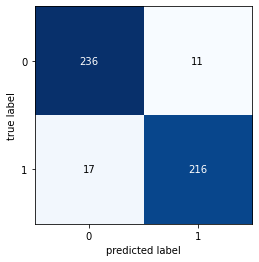

In [144]:
model_rf = RandomForestClassifier(max_features=  'sqrt', n_estimators = 200, min_samples_leaf=3, min_samples_split=3)
model_rf.fit(x_train, y_train)
y_pred_train_rf_1 = model_rf.predict(x_train)
y_pred_test_rf_1 = model_rf.predict(x_test)

y_prob_pred_rf = model_rf.predict_proba(x_test)[:, 1]
auc_rf = round(metrics.roc_auc_score(y_test, y_prob_pred_rf), 4)

print('ROC_AUC_SCORE', auc_rf)
evaluation_report(y_test,y_pred_test_rf_1)


# SVC

ROC_AUC_SCORE 0.9779
Precison : 0.93
Recall : 0.94
F1_Score : 0.94
Confusion Matrix:


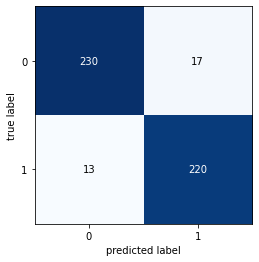

In [90]:
model_svc = SVC(C = 50, gamma = 'scale', kernel = 'rbf',probability=True)
model_svc.fit(x_train, y_train)
y_pred_train_svc_1 = model_svc.predict(x_train)
y_pred_test_svc_1 = model_svc.predict(x_test)

y_prob_pred_svc = model_svc.predict_proba(x_test)[:, 1]
auc_svc = round(metrics.roc_auc_score(y_test, y_prob_pred_svc), 4)

print('ROC_AUC_SCORE', auc_svc)

evaluation_report(y_test,y_pred_test_svc_1)


# Gradient boosting

ROC_AUC_SCORE 0.9755
Precison : 0.91
Recall : 0.94
F1_Score : 0.92
Confusion Matrix:


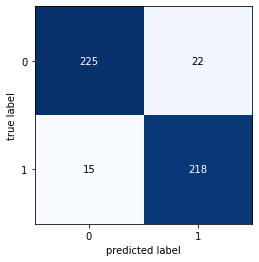

In [91]:
model_gb = GradientBoostingClassifier(n_estimators=150)
model_gb.fit(x_train, y_train)
y_pred_train_gb_1 = model_gb.predict(x_train)
y_pred_test_gb_1 = model_gb.predict(x_test)

y_prob_pred_gb = model_gb.predict_proba(x_test)[:, 1]
auc_gb = round(metrics.roc_auc_score(y_test, y_prob_pred_gb), 4)

print('ROC_AUC_SCORE', auc_gb)
evaluation_report(y_test,y_pred_test_gb_1)


# KNN

ROC_AUC_SCORE 0.9177
Precison : 0.68
Recall : 0.99
F1_Score : 0.76
Confusion Matrix:


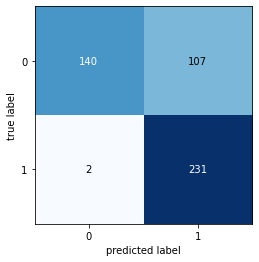

In [97]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn_train = knn.predict(x_train)
y_pred_knn_test = knn.predict(x_test)

y_prob_pred_knn = knn.predict_proba(x_test)[:, 1]
auc_knn = round(metrics.roc_auc_score(y_test, y_prob_pred_knn), 4)

print('ROC_AUC_SCORE', auc_knn)
evaluation_report(y_test,y_pred_knn_test)



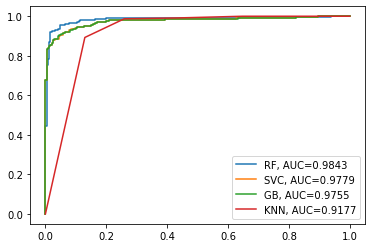

In [98]:
#set up plotting area
plt.figure(0).clf()

from sklearn import metrics

fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_prob_pred_rf)
plt.plot(fpr_rf,tpr_rf,label="RF, AUC="+str(auc_rf))

fpr_svc, tpr_svc, _ = metrics.roc_curve(y_test, y_prob_pred_svc)
plt.plot(fpr,tpr,label="SVC, AUC="+str(auc_svc))

fpr_gb, tpr_gb, _ = metrics.roc_curve(y_test, y_prob_pred_gb)
plt.plot(fpr_gb,tpr_gb,label="GB, AUC="+str(auc_gb))

fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, y_prob_pred_knn)
plt.plot(fpr_knn,tpr_knn,label="KNN, AUC="+str(auc_knn))


plt.legend()